In [2]:
# リスト 5-1-(1)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# データ作成
np.random.seed(seed=1) # 乱数を固定
X_min = 4 # Xの下限（表示用）
X_max = 30 # Xの上限（表示用）
X_n = 16 # データの個数
X = 5 + 25 * np.random.rand(X_n) # Xの生成
Prm_c = [170, 108, 0.2] #生成パラメータ
T = Prm_c[0] - Prm_c[1] * np.exp(-Prm_c[2] * X) \
    + 4 * np.random.randn(X_n) # randnは標準偏差
np.savez('ch5_data.npz', X=X, X_min=X_min, X_max=X_max, X_n=X_n, T=T)

In [3]:
# リスト 5-1-(2)
print(X)
print(np.round(X,2))

[15.42555012 23.00811234  5.00285937 12.55831432  8.66889727  7.30846487
  9.65650528 13.63901818 14.91918686 18.47041835 15.47986286 22.13048751
 10.11130624 26.95293591  5.68468983 21.76168775]
[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]


In [4]:
print(np.round(T,2))

[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


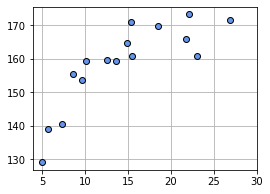

In [5]:
# リスト 5-1-(5)
# データグラフ表示
"""
インチ単位の図の寸法を指定（図そのものの大きさを指定する）

プロットの設定
marker= はマーカーの形状
linestyle= マーカーの間の線をどうするか
markeredgecolor= はマーカー表示したときの背景色

xlimでx軸でどっからどこまでのメモリにするか設定

グリッドを表示

グラフを表示

"""
plt.figure(figsize=(4,3))
plt.plot(X, T, marker='o', linestyle='None', markeredgecolor='black', color='cornflowerblue')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()

C:\Users\nakamura\AppData\Local\Temp/ipykernel_13448/2384243804.py:33: UserWarning: The following kwargs were not used by contour: 'color'
  cont = plt.contour(ww0, ww1, J, 30, color='black', levels=[100, 1000, 10000, 1000000])


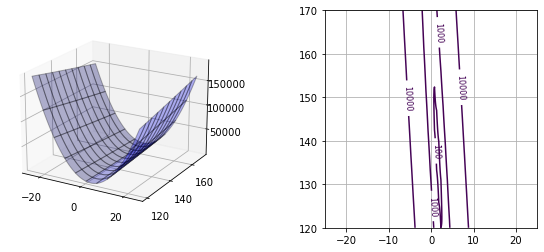

In [6]:
# リスト 5-1-(6)
from mpl_toolkits.mplot3d import Axes3D

# 平均誤差関数
def mse_line(x, t, w):
    y = w[0] * x + w[1]
    mse = np.mean((y - t)**2)
    return mse

# 計算
xn = 100 #等高線表示の解像度
w0_range = [-25, 25]
w1_range = [120, 170]
w0 = np.linspace(w0_range[0], w0_range[1], xn)
w1 = np.linspace(w1_range[0], w1_range[1], xn)
ww0, ww1 = np.meshgrid(w0, w1)
J =np.zeros((len(w0), len(w1)))
for i0 in range(len(w0)):
    for i1 in range(len(w1)):
        J[i1, i0] = mse_line(X, T, (w0[i0], w1[i1]))

# 表示
plt.figure(figsize=(9.5, 4))
plt.subplots_adjust(wspace=0.5)

ax = plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(ww0, ww1, J, rstride=10, cstride=10, alpha=0.3, color='blue', edgecolor='black')
ax.set_xticks([-20, 0, 20])
ax.set_yticks([120, 140, 160])
ax.view_init(20, -60)

plt.subplot(1, 2, 2)
cont = plt.contour(ww0, ww1, J, 30, color='black', levels=[100, 1000, 10000, 1000000])
cont.clabel(fmt='%d', fontsize=8)
plt.grid(True)
plt.show()

In [7]:
# リスト 5-1-(7)
# 平均二乗誤差の勾配
def dmse_line(x, t, w):
    y = w[0] * x + w[1]
    d_w0 = 2 * np.mean((y - t) * x)
    d_w1 = 2 * np.mean(y - t)
    return d_w0, d_w1

d_w = dmse_line(X, T, [10, 165])
print(np.round(d_w, 1))

[5046.3  301.8]


C:\Users\nakamura\AppData\Local\Temp/ipykernel_13448/32906574.py:35: UserWarning: The following kwargs were not used by contour: 'color'
  cont = plt.contour(ww0, ww1, J, 30, color='black', levels=(100, 1000, 10000, 100000))


繰り返し回数 13820
W=[1.539947, 136.176160]
dMSE=[-0.005794, 0.099991]
MSE=49.027452


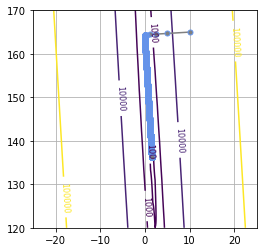

In [8]:
# リスト 5-1-(9)
# 勾配法
def fit_line_num(x, t):
    w_init = [10.0, 165.0] # 初期パラメータ
    alpha = 0.001 # 学習率
    tau_max = 100000 # 繰り返しの最大数
    eps = 0.1 # 繰り返しをやめる勾配の絶対値のしきい値
    w_hist = np.zeros([tau_max, 2])
    w_hist[0, :] = w_init
    for tau in range(1, tau_max):
        dmse = dmse_line(x, t, w_hist[tau - 1])
        w_hist[tau, 0] = w_hist[tau - 1, 0] - alpha * dmse[0]
        w_hist[tau, 1] = w_hist[tau - 1, 1] - alpha * dmse[1]
        if max(np.absolute(dmse)) < eps: #終了判定
            break
    w0 = w_hist[tau, 0]
    w1 = w_hist[tau, 1]
    w_hist = w_hist[:tau, :]
    return w0, w1, dmse, w_hist


# メイン
plt.figure(figsize=(4, 4))
# MSEの等高線表示
wn = 100
w0_range = [-25, 25]
w1_range = [120, 170]
w0 = np.linspace(w0_range[0], w0_range[1], wn)
w1 = np.linspace(w1_range[0], w1_range[1], wn)
ww0, ww1 = np.meshgrid(w0, w1)
J =  np.zeros((len(w0), len(w1)))
for i0 in range (wn):
    for i1 in range(wn):
        J[i1, i0] = mse_line(X, T, (w0[i0], w1[i1]))
cont = plt.contour(ww0, ww1, J, 30, color='black', levels=(100, 1000, 10000, 100000))
cont.clabel(fmt="%1.0f", fontsize=8)
plt.grid(True)
# 勾配法呼び出し
W0, W1, dMSE, W_history = fit_line_num(X, T)
# 結果呼び出し
print('繰り返し回数 {0}'.format(W_history.shape[0]))
print('W=[{0:.6f}, {1:.6f}]'.format(W0, W1))
print('dMSE=[{0:.6f}, {1:.6f}]'.format(dMSE[0], dMSE[1]))
print('MSE={0:.6f}'.format(mse_line(X, T, [W0, W1])))
plt.plot(W_history[:, 0], W_history[:, 1], '.-', color='gray', markersize=10, markeredgecolor='cornflowerblue')
plt.show()

w0=1.540, w1=136.176
SD=7.002 cm


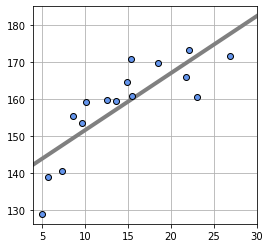

In [9]:
# リスト 5-1-(10)
# 線の表示
def show_line(w):
    xb = np.linspace(X_min, X_max, 100)
    y = w[0] * xb + w[1]
    plt.plot(xb, y, color=(.5, .5, .5), linewidth=4)

# メイン
plt.figure(figsize=(4, 4))
W= np.array([W0, W1])
mse = mse_line(X, T, W)
print('w0={0:.3f}, w1={1:.3f}'.format(W0, W1))
print("SD={0:.3f} cm".format(np.sqrt(mse)))
show_line(W)
plt.plot(X, T, marker='o', linestyle='None', color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()

w0=1.558, w1=135.872
SD=7.001 cm


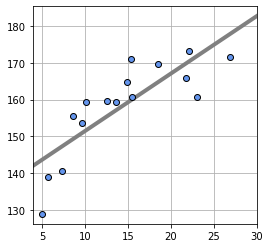

In [10]:
# リスト 5-1-(11)
# 解析解
def fit_line(x, t):
    mx = np.mean(x)
    mt = np.mean(t)
    mtx = np.mean(t * x)
    mxx = np.mean(x * x)
    w0 = (mtx - mt * mx) / (mxx - mx**2)
    w1 = mt - w0 * mx
    return np.array([w0, w1])


# メイン
W = fit_line(X, T)
print('w0={0:.3f}, w1={1:.3f}'.format(W[0], W[1]))
mse = mse_line(X, T, W)
print('SD={0:.3f} cm'.format(np.sqrt(mse)))
plt.figure(figsize=(4,4))
show_line(W)
plt.plot(X, T, marker='o', linestyle='None', color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()

In [11]:
# リスト 5-1-(12)
# 2次元データ生成
X0 = X
X0_min = 5
X0_max = 30
np.random.seed(seed=1) # 乱数を固定
X1 = 23 * (T / 100)**2 + 2 * np.random.randn(X_n)
X1_min = 40
X1_max = 75

print(np.round(X0, 2))
print(np.round(X1, 2))
print(np.round(T, 2))

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]
[70.43 58.15 37.22 56.51 57.32 40.84 57.79 56.94 63.03 65.69 62.33 64.95
 57.73 66.89 46.68 61.08]
[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


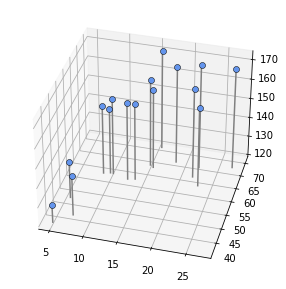

In [12]:
# リスト 5-1-(14)
# 2次元データの表示
def show_data2(ax, x0, x1, t):
    for i in range(len(x0)):
        ax.plot([x0[i], x0[i]], [x1[i], x1[i]], [120, t[i]], color='gray')
    ax.plot(x0, x1, t, 'o', color='cornflowerblue', markeredgecolor='black', markersize=6, markeredgewidth=0.5)
    ax.view_init(elev=35, azim=-75)

# メイン
plt.figure(figsize=(6,5))
ax = plt.subplot(1, 1, 1, projection='3d')
show_data2(ax, X0, X1, T)
plt.show()

SD=12.88 cm


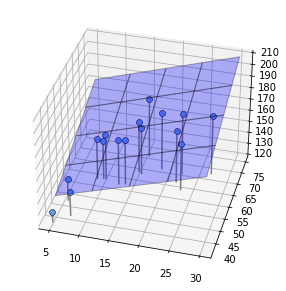

In [13]:
# リスト 5-1-(15)
# 面の表示
def show_plane(ax, w):
    px0 = np.linspace(X0_min, X0_max, 5)
    px1 = np.linspace(X1_min, X1_max, 5)
    px0, px1 = np.meshgrid(px0, px1)
    y = w[0] * px0 + w[1] * px1 + w[2]
    ax.plot_surface(px0, px1, y, rstride=1, cstride=1, alpha=0.3, color='blue', edgecolor='black')

# 面のMSE
def mse_plane(x0, x1, t, w):
    y = w[0] * x0 + w[1] * x1 + w[2]
    mse = np.mean((y - t)**2)
    return mse

# メイン
plt.figure(figsize=(6,5))
ax = plt.subplot(1, 1, 1, projection='3d')
W = [1.5, 1, 90]
show_plane(ax, W)
show_data2(ax, X0, X1, T)
mse = mse_plane(X0, X1, T, W)
print("SD={0:.2f} cm".format(np.sqrt(mse)))
plt.show()

w0=-1.8, w1=-2.9, w2=354.4
SD=47.44 cm


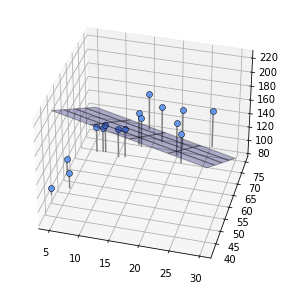

In [14]:
# リスト 5-1-(16)
# 解析解
def fit_plane(x0, x1, t):
    c_tx0 = np.mean(t * x0) - np.mean(t) * np.mean(x0)
    c_tx1 = np.mean(t * x1) - np.mean(t) * np.mean(x1)
    c_x0x1 = np.mean(x0 * x1) - np.mean(x0) * np.mean(x1)
    v_x0 = np.var(x0)
    v_x1 = np.var(x1)
    w0 = (c_tx0 * c_x0x1 - v_x0 + c_tx0) / (c_x0x1**2 - v_x0 * v_x1)
    w1 = (c_tx1 * c_x0x1 - v_x1 + c_tx1) / (c_x0x1**2 - v_x0 * v_x1)
    w2 = -w0 * np.mean(x0) - w1 * np.mean(x1) + np.mean(t)
    return np.array([w0, w1, w2])

# メイン
plt.figure(figsize=(6,5))
ax = plt.subplot(1, 1, 1, projection='3d')
W = fit_plane(X0, X1, T)
print("w0={0:.1f}, w1={1:.1f}, w2={2:.1f}".format(W[0], W[1], W[2]))
show_plane(ax, W)
show_data2(ax, X0, X1, T)
mse = mse_plane(X0, X1, T, W)
print("SD={0:.2f} cm".format(np.sqrt(mse)))
plt.show()

In [15]:
# リスト 5-2-(1)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# データのロード
outfile = np.load('ch5_data.npz')
X = outfile['X']
X_min = 0
X_max = outfile['X_max']
X_n = outfile['X_n']
T = outfile['T']

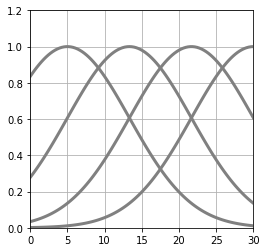

In [16]:
# リスト 5-2-(2)
# ガウス関数
def gauss(x, mu, s):
    return np.exp(-(x - mu)**2 / (2 * s**2))

# メイン
M = 4
plt.figure(figsize=(4, 4))
mu = np.linspace(5, 30, M)
s = mu[1] - mu[0]
xb = np.linspace(X_min, X_max, 100)
for j in range(M):
    y = gauss(xb, mu[j], s)
    plt.plot(xb, y, color='gray', linewidth=3)
plt.grid(True)
plt.xlim(X_min, X_max)
plt.ylim(0, 1.2)
plt.show()

W=[29.4 75.7  2.9 98.3 54.9]
SD=3.98 cm


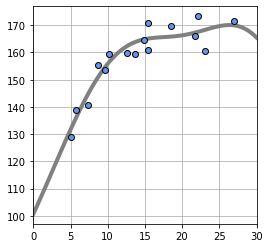

In [17]:
# リスト 5-2-(4)
# 線形基底関数モデル
def gauss_func(w, x):
    m = len(w) - 1
    mu = np.linspace(5, 30, m)
    s = mu[1] - mu[0]
    y = np.zeros_like(x)
    for j in range(m):
        y = y + w[j] * gauss(x, mu[j], s)
    y = y + w[m]
    return y

# 線形基底関数モデルMSE
def mse_gauss_func(x, t, w):
    y = gauss_func(w, x)
    mse = np.mean((y -t)**2)
    return mse

# 線形基底関数モデル 厳密解
def fit_gauss_func(x, t, m):
    mu = np.linspace(5, 30, m)
    s = mu[1] - mu[0]
    n = x.shape[0]
    phi = np.ones((n, m+1))
    for j in range(m):
        phi[:,j] = gauss(x, mu[j], s)
    phi_T = np.transpose(phi)

    b = np.linalg.inv(phi_T.dot(phi))
    c = b.dot(phi_T)
    w = c.dot(t)
    return w

# ガウス基底関数表示
def show_gauss_func(w):
    xb = np.linspace(X_min, X_max, 100)
    y = gauss_func(w, xb)
    plt.plot(xb, y, c=[.5, .5, .5], lw=4)

# メイン
plt.figure(figsize=(4,4))
M = 4
W = fit_gauss_func(X, T, M)
show_gauss_func(W)
plt.plot(X, T, marker='o', linestyle='None', color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
mse = mse_gauss_func(X, T, W)
print("W=" + str(np.round(W, 1)))
print("SD={0:.2f} cm".format(np.sqrt(mse)))
plt.show()

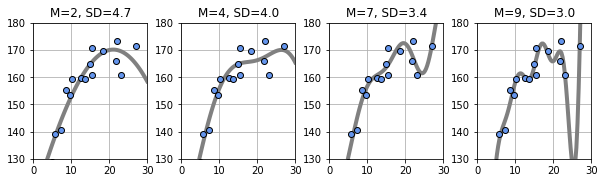

In [18]:
# リスト 5-2-(8)
plt.figure(figsize=(10, 2.5))
plt.subplots_adjust(wspace=0.3)
M =[2,4,7,9]
for i in range(len(M)):
    plt.subplot(1, len(M), i + 1)
    W = fit_gauss_func(X, T, M[i])
    show_gauss_func(W)
    plt.plot(X, T, marker='o', linestyle='None', color='cornflowerblue', markeredgecolor='black')
    plt.xlim(X_min, X_max)
    plt.grid(True)
    plt.ylim(130, 180)
    mse = mse_gauss_func(X, T, W)

    plt.title("M={0:d}, SD={1:.1f}".format(M[i], np.sqrt(mse)))
plt.show()

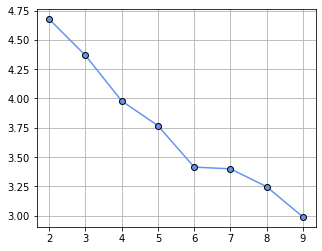

In [19]:
# リスト 5-2-(9)
plt.figure(figsize=(5,4))
M = range(2, 10)
mse2 = np.zeros(len(M))
for i in range(len(M)):
    W = fit_gauss_func(X, T, M[i])
    
    mse2[i] = np.sqrt(mse_gauss_func(X, T, W))
plt.plot(M ,mse2, marker='o', color='cornflowerblue', markeredgecolor='black')
plt.grid(True)
plt.show()

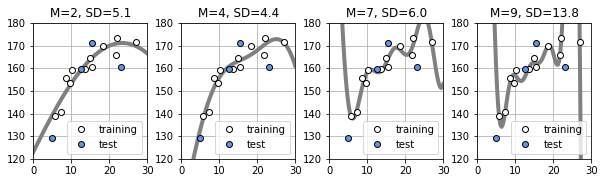

In [20]:
# リスト 5-2-(10)
# 訓練データとテストデータ
X_test = X[:int(X_n / 4)]
T_test = T[:int(X_n / 4)]
X_train = X[int(X_n / 4):]
T_train = T[int(X_n / 4):]

# メイン
plt.figure(figsize=(10, 2.5))
plt.subplots_adjust(wspace=0.3)
M = [2,4,7,9]
for i in range(len(M)):
    plt.subplot(1, len(M), i + 1)
    W = fit_gauss_func(X_train, T_train, M[i])
    show_gauss_func(W)
    plt.plot(X_train, T_train, marker='o', linestyle='None', color='white', markeredgecolor='black', label='training')
    plt.plot(X_test, T_test, marker='o', linestyle='None', color='cornflowerblue', markeredgecolor='black', label='test')
    plt.legend(loc='lower right', fontsize=10, numpoints=1)
    plt.xlim(X_min, X_max)
    plt.grid(True)
    plt.ylim(120, 180)
    mse = mse_gauss_func(X, T, W)

    plt.title("M={0:d}, SD={1:.1f}".format(M[i], np.sqrt(mse)))
plt.show()

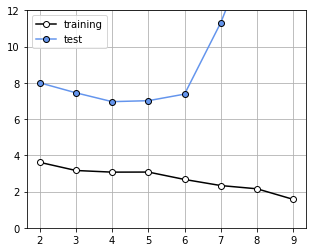

In [21]:
# リスト 5-2-(11)
plt.figure(figsize=(5,4))
M = range(2, 10)
mse_train = np.zeros(len(M))
mse_test = np.zeros(len(M))
for i in range(len(M)):
    W = fit_gauss_func(X_train, T_train, M[i])
    mse_train[i] = np.sqrt(mse_gauss_func(X_train, T_train, W))
    mse_test[i] = np.sqrt(mse_gauss_func(X_test, T_test, W))
plt.plot(M, mse_train, marker='o', linestyle='-', markerfacecolor='white', markeredgecolor='black', color='black', label='training')
plt.plot(M, mse_test, marker='o', linestyle='-', markeredgecolor='black', color='cornflowerblue', label='test')
plt.legend(loc='upper left', fontsize=10)
plt.ylim(0, 12)
plt.grid(True)
plt.show()

In [22]:
# リスト 5-2-(12)
# K分割交差検証
def kfold_gauss_func(x, t, m, k):
    n = x.shape[0]
    mse_train = np.zeros(k)
    mse_test = np.zeros(k)
    for i in range(0, k):
        x_train = x[np.fmod(range(n), k) != i]
        t_train = t[np.fmod(range(n), k) != i]
        x_test = x[np.fmod(range(n), k) == i]
        t_test = t[np.fmod(range(n), k) == i]
        wm = fit_gauss_func(x_train, t_train, m)
        mse_train[i] = mse_gauss_func(x_train, t_train, wm)
        mse_test[i] = mse_gauss_func(x_test, t_test, wm)
    return mse_train, mse_test

In [23]:
# リスト 5-2-(13)
np.fmod(range(10), 5)

array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4], dtype=int32)

In [24]:
# リスト 5-2-(14)
M =4
K = 4
kfold_gauss_func(X, T, M, K)

(array([12.87927851,  9.81768697, 17.2615696 , 12.92270498]),
 array([ 39.65348229, 734.70782012,  18.30921743,  47.52459642]))

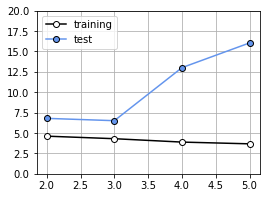

In [25]:
# リスト 5-2-(15)
M = range(2, 6)
K =16
Cv_Gauss_train = np.zeros((K, len(M)))
Cv_Gauss_test = np.zeros((K, len(M)))
for i in range(0, len(M)):
    Cv_Gauss_train[:, i], Cv_Gauss_test[:,i]=\
        kfold_gauss_func(X, T, M[i], K)
mean_Gauss_train = np.sqrt(np.mean(Cv_Gauss_train, axis=0))
mean_Gauss_test = np.sqrt(np.mean(Cv_Gauss_test, axis=0))

plt.figure(figsize=(4,3))
plt.plot(M, mean_Gauss_train, marker='o', linestyle='-', markerfacecolor='w', color='k', label='training')
plt.plot(M, mean_Gauss_test, marker='o', linestyle='-', markeredgecolor='black', color='cornflowerblue', label='test')
plt.legend(loc='upper left', fontsize=10)
plt.ylim(0, 20)
plt.grid(True)
plt.show()

SD=4.37 cm


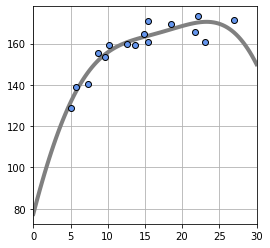

In [26]:
# リスト 5-2-(16)
M = 3
plt.figure(figsize=(4,4))
W = fit_gauss_func(X, T, M)
show_gauss_func(W)
plt.plot(X, T, marker='o', linestyle='None', markeredgecolor='black', color='cornflowerblue')
plt.xlim([X_min, X_max])
plt.grid(True)
mse = mse_gauss_func(X, T, W)
print("SD={0:.2f} cm".format(np.sqrt(mse)))
plt.show()

w0=169.0, w1=113.7, w2=0.2
SD=3.86 cm


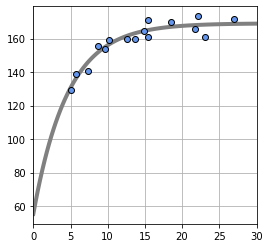

In [27]:
# リスト 5-2-(17)
# モデルA
def model_A(x, w):
    y = w[0] - w[1] * np.exp(-w[2] * x)
    return y

# モデルA表示
def show_model_A(w):
    xb = np.linspace(X_min, X_max, 100)
    y = model_A(xb, w)
    plt.plot(xb, y, c=[.5, .5, .5], lw=4)

# モデルAのMSE
def mse_model_A(w, x, t):
    y = model_A(x, w)
    mse = np.mean((y-t)**2)
    return mse

from scipy.optimize import minimize

# モデルAのパラメータ最適化
def fit_model_A(w_init, x, t):
    res1 = minimize(mse_model_A, w_init, args=(x,t), method='powell')
    return res1.x

# メイン
plt.figure(figsize=(4,4))
W_init=[100,0,0]
W = fit_model_A(W_init, X, T)
print("w0={0:.1f}, w1={1:.1f}, w2={2:.1f}".format(W[0], W[1], W[2]))
show_model_A(W)
plt.plot(X, T, marker='o', linestyle='None', color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
mse = mse_model_A(W, X, T)
print("SD={0:.2f} cm".format(np.sqrt(mse)))
plt.show()

Gauss(M=3) SD=6.51cm
Model A SD=4.72cm


ValueError: shape mismatch: objects cannot be broadcast to a single shape

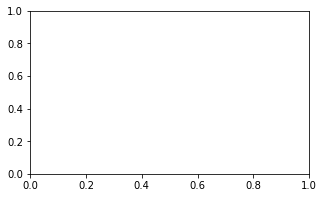

In [31]:
# リスト 5-2-(20)
#交差検証 model_A--------------------------------
def kfold_model_A(x,t,k):
    n=len(x)
    mse_train=np.zeros(k)
    mse_test=np.zeros(k)
    for i in range(0,k):
        x_train=x[np.fmod(range(n),k) !=i]
        t_train=t[np.fmod(range(n),k) !=i]
        x_test=x[np.fmod(range(n),k) ==i]
        t_test=t[np.fmod(range(n),k) ==i]
        wm=fit_model_A(np.array([169,113,0.2]),x_train,t_train)
        mse_train[i]=mse_model_A(wm,x_train,t_train)
        mse_test[i]=mse_model_A(wm,x_test,t_test)
    return mse_train,mse_test

#メイン--------------------------------
K=16
Cv_A_train,Cv_A_test=kfold_model_A(X,T,K)
mean_A_test=np.sqrt(np.mean(Cv_A_test))
print("Gauss(M=3) SD={0:.2f}cm".format(mean_Gauss_test[1]))
print("Model A SD={0:.2f}cm".format(mean_A_test))
SD=np.append(mean_Gauss_test[0:5],mean_A_test)
M=range(6)
label=["M=2","M=3","M=4","M=5","M=6","Model A"]
plt.figure(figsize=(5,3))
plt.bar(M,SD,tick_label=label,align='center',facecolor='cornflowerblue')
plt.show()